# Cameras and Detectors

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point

import contextily as ctx
import matplotlib.pyplot as plt

## 1 Load information

### 1.1 Cameras

In [2]:
# load invalid cameras
with open('./snapshot/fail cam.txt', 'r') as file:
    invalid_cameras = file.read().splitlines()

In [3]:
# load information
cameras_path = r"Z:\Data\HK\snapshot HK\doc\Traffic_Camera_Locations_En.xml"
cameras = pd.read_xml(cameras_path)
# tranfer to geopandas
cameras['geometry'] = cameras.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
cameras_gdf = gpd.GeoDataFrame(cameras, geometry='geometry', crs='epsg:4326')
# check if valid
cameras_gdf['valid'] = ~cameras_gdf['key'].isin(invalid_cameras)  
cameras_gdf.head()

,key,region,district,description,easting,northing,latitude,longitude,url,geometry,valid
0,H429F,Hong Kong Island,Southern,Aberdeen Praya Road near Fish Market [H429F],833514,812196,22.248525,114.150158,https://tdcctv.data.one.gov.hk/H429F.JPG,POINT (114.15016 22.24853),True
1,H210F,Hong Kong Island,Wan Chai,Aberdeen Tunnel - Wan Chai Side [H210F],836504,815117,22.274906,114.179164,https://tdcctv.data.one.gov.hk/H210F.JPG,POINT (114.17916 22.27491),False
2,H421F,Hong Kong Island,Southern,Aberdeen Tunnel - Aberdeen Side [H421F],836245,812386,22.250244,114.176651,https://tdcctv.data.one.gov.hk/H421F.JPG,POINT (114.17665 22.25024),False
3,H422F2,Hong Kong Island,Southern,Ap Lei Chau Bridge Road near Aberdeen Police S...,834632,812129,22.247922,114.161003,https://tdcctv.data.one.gov.hk/H422F2.JPG,POINT (114.16100 22.24792),False
4,H904F,Hong Kong Island,Wan Chai,Canal Road Flyover near Gloucester Road [H904F],836731,815614,22.279394,114.181367,https://tdcctv.data.one.gov.hk/H904F.JPG,POINT (114.18137 22.27939),False


### 1.2 Detectors

In [ ]:
# import requests
# import xmltodict
# from tqdm import tqdm

In [2]:
# # load information of detectors
# def get_dict(url):
#     res = requests.get(url)
#     data = xmltodict.parse(res.content)
#     return data

# # raw data dict
# url = 'https://resource.data.one.gov.hk/td/traffic-detectors/volByVClass-all.xml'
# data = get_dict(url)

In [72]:
# # dict to dataframe
# def get_df(data):
#     """
#     Transform xml dict to dataframe
#     """
#     df_dict = {
#         'period_from': [],
#         'period_to': [],
#         'detector_id': [],
#         'valid': [],
#         'direction': [],
#         'MOTOR CYCLE': [],
#         'PRIVATE CAR': [],
#         'TAXI': [],
#         'PRIVATE LIGHT BUS': [],
#         'PUBLIC LIGHT BUS': [],
#         'LIGHT GOODS VEHICLE': [],
#         'MEDIUM/HEAVY GOODS VEHICLE': [],
#         'NON-FRANCHISED BUS': [],
#         'FRANCHAISED BUS (S.D.)': [],
#         'FRANCHIASED BUS (D.D.)': [],
#         'COMMERCIAL VEHICLE': [],
#     }
#     # date
#     date  =data['traffic_volume_list']['date']
#     # iter periods
#     periods = data['traffic_volume_list']['periods']['period']
#     for period in tqdm(periods):
#         t_from = period['period_from']
#         t_to = period['period_to']

#         # iter detectors
#         detectors = period['detectors']['detector']
#         for detector in detectors:
#             df_dict['period_from'].append(t_from)
#             df_dict['period_to'].append(t_to)
#             df_dict['detector_id'].append(detector['detector_id'])
#             df_dict['valid'].append(detector['valid'])
#             try:
#                 df_dict['direction'].append(detector['direction'])
#             except:
#                 df_dict['direction'].append('')
                
#             # iter vehicle classes
#             vehicles = detector['vehicle_class']['class']
#             for veh in vehicles:
#                 df_dict[veh['class_name']].append(veh['proportion'])

#     return pd.DataFrame(df_dict), date

In [83]:
# # match detector info
# def match_info(df, info):
#     """
#     Match location information to each detector.
#     """
#     return df.set_index('detector_id').join(info[['Device_ID', 'District', 'Road_EN', 'Latitude', 'Longitude', 'Direction', 'Rotation']].set_index('Device_ID')).reset_index()

In [84]:
# df, date = get_df(data)
# info = pd.read_csv(r"Z:\Data\HK\hourly traffic volumes by proportions of vehicle classes\traffic_prop_vehicle_class_info.csv")
# df = match_info(df, info)
# df.to_csv("Z:/Data/HK/hourly traffic volumes by proportions of vehicle classes/data/veh-class_%s.csv" % date)

100%|██████████| 26/26 [00:00<00:00, 3989.46it/s]


In [4]:
detectors = pd.read_csv('./hourly prop/traffic_prop_vehicle_class_info.csv')
detectors['geometry'] = detectors.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
detectors_gdf = gpd.GeoDataFrame(detectors, geometry='geometry', crs='epsg:4326')
detectors_gdf

,Device_ID,District,Road_EN,Road_TC,Road_SC,Easting,Northing,Latitude,Longitude,Direction,Rotation,geometry
0,TCS01101-1,Wan Chai,Wong Nai Chung Gap Flyover,黃泥涌峽天橋,黄泥涌峡天桥,836609,814749,22.271583,114.180183,North West,320,POINT (114.18018 22.27158)
1,TCS01101-2,Wan Chai,Wong Nai Chung Gap Flyover,黃泥涌峽天橋,黄泥涌峡天桥,836609,814749,22.271583,114.180183,North West,320,POINT (114.18018 22.27158)
2,TCS01102,Kowloon City,Princess Margaret Road,公主道,公主道,836248,819247,22.312203,114.176680,North West,350,POINT (114.17668 22.31220)
3,TCS01103,Sha Tin,Lion Rock Tunnel Road,獅子山隧道公路,狮子山隧道公路,836167,824542,22.360020,114.175894,North East,40,POINT (114.17589 22.36002)
4,TCS01202,Kowloon City,Princess Margaret Road,公主道,公主道,836276,819369,22.313304,114.176952,South West,190,POINT (114.17695 22.31330)
...,...,...,...,...,...,...,...,...,...,...,...,...
71,JCR20001,North,Jockey Club Road,馬會道,马会道,833121,833818,22.443780,114.146300,North West,315,POINT (114.14630 22.44378)
72,NCWBR10001,Kwun Tong,New Clear Water Bay Road,新清水灣道,新清水湾道,839949,821587,22.333330,114.212600,South East,135,POINT (114.21260 22.33333)
73,TKR10001,Tai Po,Ting Kok Road,汀角路,汀角路,837504,835859,22.462220,114.188900,East,90,POINT (114.18890 22.46222)
74,TPR10001,Sha Tin,Tai Po Road - Ma Liu Shui,大埔公路馬料水段,大埔公路马料水段,839035,830904,22.417470,114.203700,South East,135,POINT (114.20370 22.41747)


## 2 Spatial analysis

### 2.1 Distribution

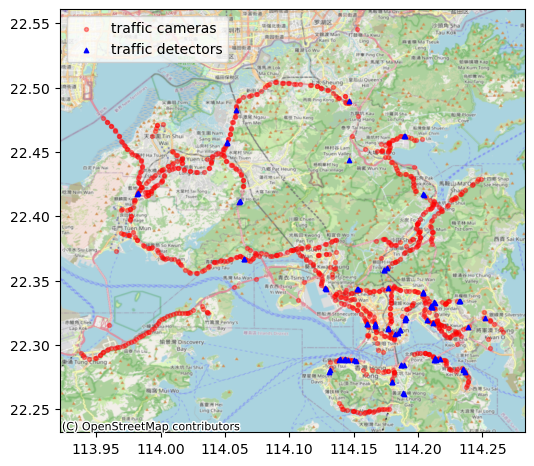

In [18]:
# plot cameras and detectors
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=100)

# cameras
cameras_gdf[cameras_gdf['valid'] == True].plot(
    ax=ax, zorder=1,
    color='red', marker='o', markersize=8, alpha=0.4,
    label='traffic cameras',
)

# detectors
detectors_gdf.plot(
    ax=ax, zorder=5,
    color='blue', marker='^', markersize=10,
    label='traffic detectors'
)
# base map
ctx.add_basemap(ax=ax, crs=cameras_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# legend
plt.legend()
plt.show()

In [8]:
import folium

m = folium.Map(location=[22.3193, 114.1694], zoom_start=12)

for id, camera in cameras_gdf.iterrows():
    # 获取摄像头位置
    camera_location = camera.geometry.coords[0]
    folium.Marker(
        location=[camera_location[1], camera_location[0]],
        popup=f'Camera: {camera.key}',
        icon=folium.Icon(color='red', icon='camera', perfix='fa')
    ).add_to(m)

for id, detector in detectors_gdf.iterrows():
    # 获取探测器位置
    detector_location = detector.geometry.coords[0]
    folium.Marker(
        location=[detector_location[1], detector_location[0]],
        popup=f'Detector: {detector.Device_ID}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 保存地图到 HTML 文件
m.save('./matched/all_cam_det.html')
m

### 2.2 Matching

In [13]:
results = []
cameras_gdf_meter = cameras_gdf.to_crs(3857)
detectors_gdf_meter = detectors_gdf.to_crs(3857)

for id, detector in detectors_gdf_meter.iterrows():
    point1 = detector['geometry']
    # 3 meters buffer
    buffer = point1.buffer(200)
    within_buffer = cameras_gdf_meter[cameras_gdf_meter['geometry'].within(buffer)]
    # get keys
    keys = within_buffer['key'].tolist()
    if keys:
        results.append((detector['Device_ID'], keys))

# transfer and merge
result_df = pd.DataFrame(results, columns=['Device_ID', 'key']).explode(column='key')
result_df = pd.merge(result_df, detectors_gdf[['Device_ID', 'District', 'Road_EN', 'Direction']], on=['Device_ID'])
result_df = pd.merge(result_df, cameras_gdf[['key', 'description']], on=['key'])
result_df

,Device_ID,key,District,Road_EN,Direction,description
0,TCS01101-1,AID01108,Wan Chai,Wong Nai Chung Gap Flyover,North West,Wong Nai Chung Gap Flyover near Racecourse - N...
1,TCS01101-2,AID01108,Wan Chai,Wong Nai Chung Gap Flyover,North West,Wong Nai Chung Gap Flyover near Racecourse - N...
2,TCS01102,AID01114,Kowloon City,Princess Margaret Road,North West,Princess Margaret Road near Oi Man Estate - No...
3,TCS01202,AID01114,Kowloon City,Princess Margaret Road,South West,Princess Margaret Road near Oi Man Estate - No...
4,TCS01102,AID01210,Kowloon City,Princess Margaret Road,North West,Princess Margaret Road near Oi Man Estate - So...
...,...,...,...,...,...,...
111,JCR10001,TDSJCR20002,North,Jockey Club Road,South East,Jockey Club Road near Fanling Highway - Northb...
112,TKR10001,TDSTKR20004,Tai Po,Ting Kok Road,East,Ting Kok Road near Ting Hing Road - Westbound ...
113,TPR10001,TDSTPR10013,Sha Tin,Tai Po Road - Ma Liu Shui,South East,Tai Po Road - Ma Liu Shui near University Aven...
114,TPR20001,TDSTPR10013,Sha Tin,Tai Po Road - Ma Liu Shui,North West,Tai Po Road - Ma Liu Shui near University Aven...


In [12]:
# result_df.to_csv('./matched/matched_cam_det.csv', index=False)

### 2.3 Select mannually

In [21]:
matched = pd.read_csv("./matched/matched_cam_det.csv")
matched = matched[matched['Valid'] == True].reset_index(drop=True)
matched

,Device_ID,key,Valid,District,Road_EN,Direction,description
0,ALPR90002,TDS91064,True,Yeun Long,San Tin Highway,South,San Tin Highway near Geranium Path - Southboun...
1,ALPR90005,TDS90025,True,Tsuen Wan,Tuen Mun Road,North West,Tuen Mun Road near Sham Tseng - Westbound (1) ...
2,ALPR90005-2,TDS90025,True,Tsuen Wan,Tuen Mun Road,North West,Tuen Mun Road near Sham Tseng - Westbound (1) ...
3,CPRLT10001,TDSCPRLT10001,True,Yeun Long,Castle Peak Rd-Lam Tei,North East,Castle Peak Rd-Lam Tei near Lam Tei Interchang...
4,CPRLT20001,TDSCPRLT20001,True,Yeun Long,Castle Peak Rd-Lam Tei,South West,Castle Peak Rd-Lam Tei near Lam Tei Main Stree...
5,CWBR10001,TDSNCWBR20004,True,Sai Kung,Clear Water Bay Road,North West,New Clear Water Bay Road near On Sau Road - We...
6,JCR10001,TDSJCR10002,True,North,Jockey Club Road,South East,Jockey Club Road near Fanling Highway - Southb...
7,PFLR20001,H130F,True,Central and Western,Pok Fu Lam Road,South,Pok Fu Lam Road near Pokfield Road [H130F]
8,TCS01101-2,AID01108,True,Wan Chai,Wong Nai Chung Gap Flyover,North West,Wong Nai Chung Gap Flyover near Racecourse - N...
9,TCS01102,AID01114,True,Kowloon City,Princess Margaret Road,North West,Princess Margaret Road near Oi Man Estate - No...


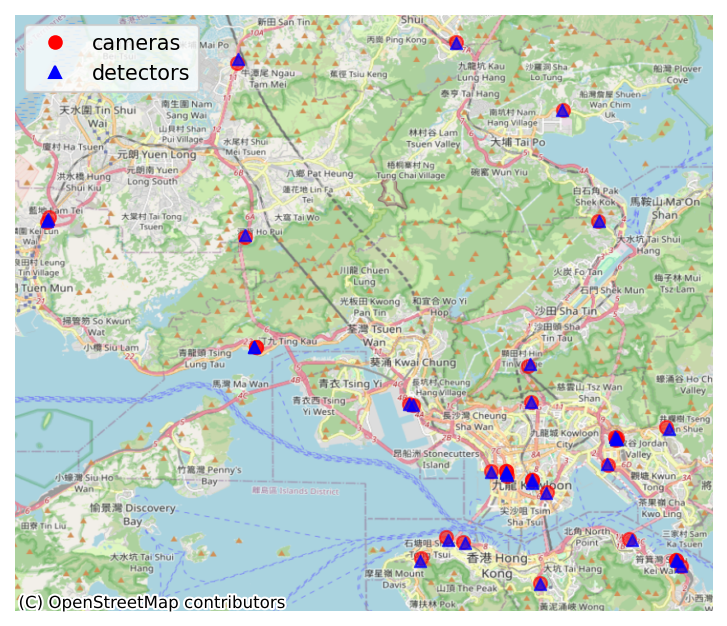

In [22]:
# plot cameras and detectors
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi=150)

for detector, camera in zip(matched['Device_ID'], matched['key']):
   
    # cameras
    cameras_gdf[cameras_gdf['key'] == camera].plot(
        ax=ax, zorder=1,
        color='red', marker='o', markersize=40, alpha=0.6,
    )

    # detectors
    detectors_gdf[detectors_gdf['Device_ID'] == detector].plot(
        ax=ax, zorder=5,
        color='blue', marker='^', markersize=30, alpha=0.7
    )
# base map
ctx.add_basemap(ax=ax, crs=cameras_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# legend
from matplotlib.lines import Line2D
cameras_legend = Line2D([0], [0], marker='o', color='red', lw=0)
detectors_legend = Line2D([0], [0], marker='^', color='blue', lw=0)
plt.legend([cameras_legend, detectors_legend], ['cameras', 'detectors'], loc=2)
ax.axis('off')
plt.show()

In [18]:
import folium

m = folium.Map(location=[22.3193, 114.1694], zoom_start=12)

for detector, camera in zip(result_df['Device_ID'], result_df['key']):
    # 获取摄像头位置
    camera_location = cameras_gdf[cameras_gdf['key'] == camera].geometry.iloc[0].coords[0]
    folium.Marker(
        location=[camera_location[1], camera_location[0]],
        popup=f'Camera: {camera}',
        icon=folium.Icon(color='red', icon='camera', perfix='fa')
    ).add_to(m)

    # 获取探测器位置
    detector_location = detectors_gdf[detectors_gdf['Device_ID'] == detector].geometry.iloc[0].coords[0]
    folium.Marker(
        location=[detector_location[1], detector_location[0]],
        popup=f'Detector: {detector}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 保存地图到 HTML 文件
# m.save('./matched/matched_cam_det.html')
m